# Pymaceuticals Inc.
---

### Analysis

- A total of 248 mice that had SCC tumors present were tested on with differing experimental drugs to see how it could affect the tumors that were present.
- The tests were completed over a time span of 45 days and a total of 10 different drugs were used on the mice. Only 1 experimental drug was used per mouse.
- The drugs that had the best results were Capomulin and Ramicane. Final tumor volumes were on avarage 40 mm3 with the use of these two previously named drugs compared to tumors sizes in the 50 to 55 mm3 ranges.
- Th
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_data.loc[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False) == True]
duplicate_mice_by_ID = duplicate_mice_df['Mouse ID'].unique()
print(duplicate_mice_by_ID)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
optional_df = combined_data.set_index("Mouse ID")
optional_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.copy()
for id in duplicate_mice_by_ID:
    index = clean_df.loc[clean_df['Mouse ID'] == id].index
    clean_df = clean_df.drop(index=index)
print(clean_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_of_mice = clean_df["Mouse ID"].nunique()
print(clean_num_of_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = combined_data.groupby("Drug Regimen")

tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_variance = summary_df["Tumor Volume (mm3)"].var()
tumor_std_dev = summary_df["Tumor Volume (mm3)"].std()
tumor_SEM = summary_df["Tumor Volume (mm3)"].sem()

grouped_summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std_dev,
    "Tumor Volume Std. Err.": tumor_SEM})
grouped_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

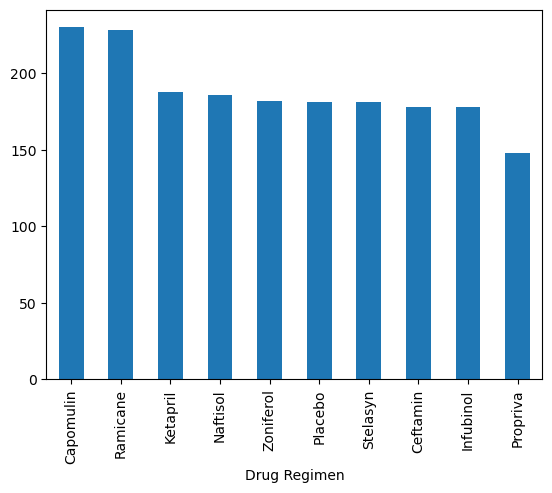

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
bar_chart.plot.bar()
plt.show()


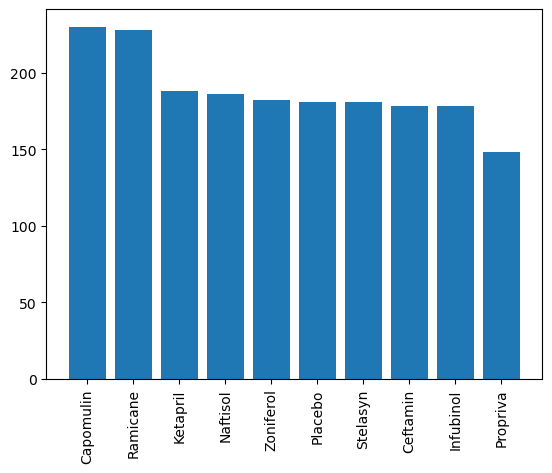

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_val = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
x_val = y_val.index
plt.bar(x_val,y_val)
plt.xticks(rotation='vertical')
plt.show()

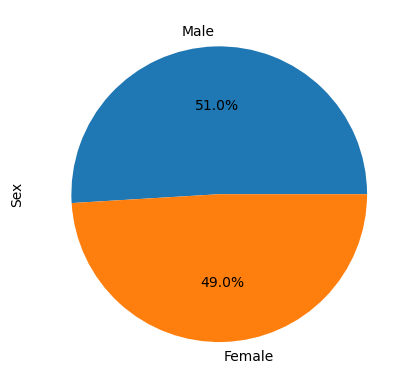

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = clean_df['Sex'].value_counts()
pie_chart.plot.pie(autopct='%1.1f%%')
plt.show()


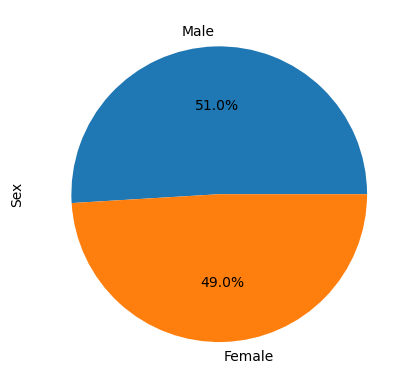

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = clean_df['Sex'].value_counts()
labels = values.index
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_resuts = pd.merge(clean_df, last_timepoints, how='inner', on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = reduced_resuts.loc[reduced_resuts['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(volumes)
    
    # Determine outliers using upper and lower bounds
    lowerq = volumes.quantile(0.25)
    upperq = volumes.quantile(0.75)
    iqr = upperq - lowerq
    outliers = volumes.loc[volumes < (lowerq-(1.5*iqr) or volumes > (upperq+(1.5*iqr)))]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


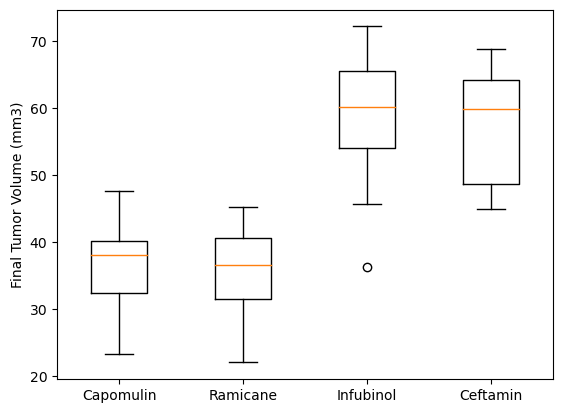

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatment_list)
plt.show()


## Line and Scatter Plots

In [18]:
x = 'Capomulin'
capomulin_df = clean_df.loc[clean_df['Drug Regimen']==x]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


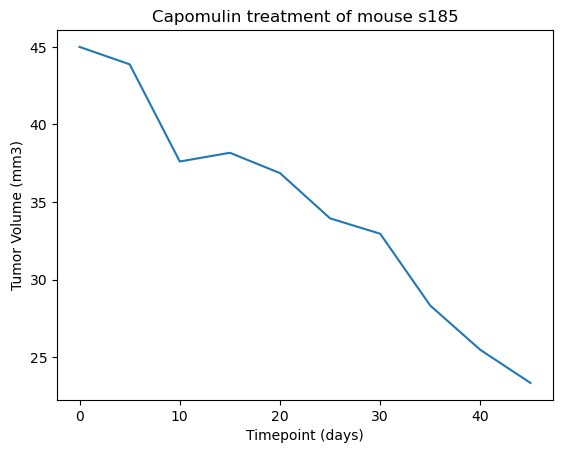

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_id = 's185'
capomulin_mouse = clean_df.loc[clean_df['Mouse ID'] == capomulin_id]
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title(f'Capomulin treatment of mouse {capomulin_id}')
plt.show()


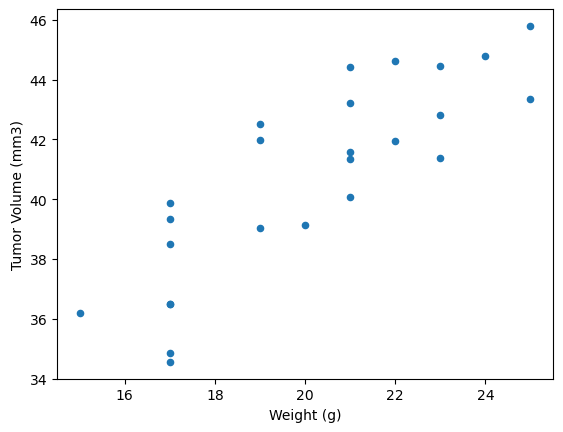

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice_list = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_mice_list.groupby('Mouse ID').mean()
capomulin_avg.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


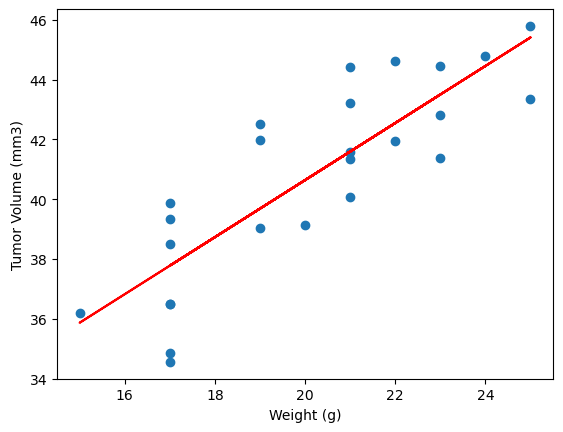

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = capomulin_avg['Weight (g)']
y_val = capomulin_avg['Tumor Volume (mm3)']

correlation = st.pearsonr(x_val, y_val)[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_vals = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_vals,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=13,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()